# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## 读取数据

导入所需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

将数据读入`original_data`中，把清洗后的数据放在`cleaned_data`中

In [3]:
original_data = pd.read_csv("house_price.csv")
original_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
cleaned_data = original_data.copy()

## 评估和清洗数据

### 数据的整洁度

In [5]:
cleaned_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


符合"一个变量一列，每个观察值为一行，每种类型的观察单位为一个表格"的标准，因此可以认为该数据整洁度很好

### 数据的干净度

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从输出结果来看，`cleaned_data`共有545条观察值，变量不存在缺失值。

数据类型方面，我们已知`mainroad`（是否位于主路）、`guestroom`（是否有客房）、`basement`（是否有地下室）、`hotwaterheating`（是否有热水器）、`airconditioning`（是否有空调）、`prefarea`（是否位于城市首选社区）、`furnishingstatus`（装修状态）都是分类数据，可以把数据类型都转换为Category。

In [9]:
cleaned_data['mainroad'] = cleaned_data['mainroad'].astype("category")
cleaned_data['guestroom'] = cleaned_data['guestroom'].astype("category")
cleaned_data['basement'] =cleaned_data['basement'].astype("category")
cleaned_data['hotwaterheating'] = cleaned_data['hotwaterheating'].astype("category")
cleaned_data['airconditioning'] = cleaned_data['airconditioning'].astype("category")
cleaned_data['prefarea'] =cleaned_data['prefarea'].astype("category")
cleaned_data['furnishingstatus'] = cleaned_data['furnishingstatus'].astype("category")

In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### 处理缺失数据

从`info`结果看，无需处理缺失数据

#### 处理重复数据

根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

#### 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [12]:
cleaned_data["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [13]:
cleaned_data["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [14]:
cleaned_data["basement"].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [15]:
cleaned_data["hotwaterheating"].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [16]:
cleaned_data["airconditioning"].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [17]:
cleaned_data["prefarea"].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [18]:
cleaned_data["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

从以上输出结果来看，均不存在不一致数据。

#### 处理错误或无效数据

In [19]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


从以上统计信息来看，`cleaned_data`里不存在脱离现实意义的数值。

## 探索数据

In [20]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

### 房价分布

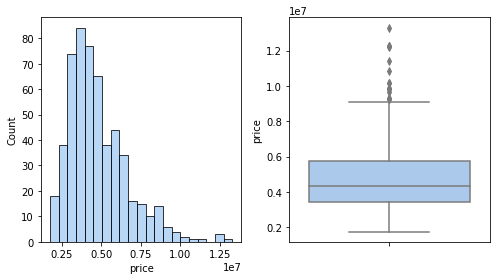

In [39]:
plt.rcParams["figure.figsize"] = [7.00,4]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_data, x='price', ax=axes[0])
sns.boxplot(data=cleaned_data, y='price', ax=axes[1])
plt.show()

房价呈右偏态分布，说明数据集中的大多数房子价格中等，但有一些价格很高的极端值，使得均值被拉高。

### 面积分布

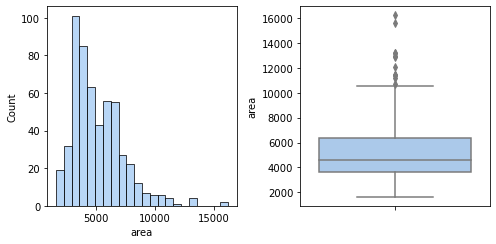

In [29]:
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_data, x='area', ax=axes[0])
sns.boxplot(data=cleaned_data, y='area', ax=axes[1])
plt.show()

面积的分布与房价相似，也呈右偏态分布

### 房价与面积的关系

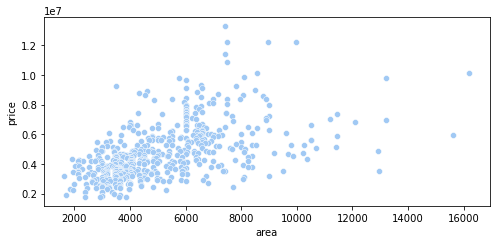

In [32]:
sns.scatterplot(data=cleaned_data, x='area', y='price')
plt.show()

从散点图来看，能大致看出一些正相关关系，但关系的强度需要后续通过计算相关性来得到。

### 卧室数与房价

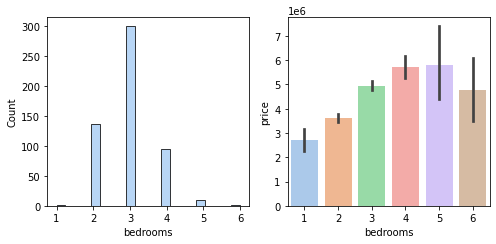

In [36]:
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_data, x='bedrooms', ax=axes[0])
sns.barplot(data=cleaned_data, x='bedrooms', y='price', ax=axes[1])
plt.show()

此数据集中房子的卧室数范围为1-6个，其中大多房子有2-4个。

从平均房价与卧室数之间的柱状图来看，当卧室数小于5个时，卧室数多的房子价格也相应高，但一旦多于5个，房价并不一定相应更高。

### 洗手间数与房价

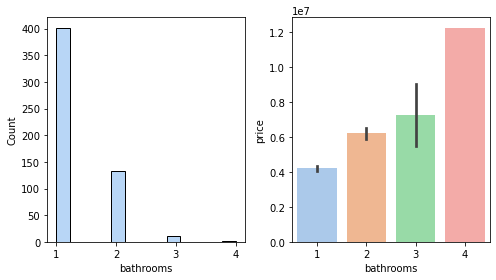

In [42]:
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_data, x='bathrooms', ax=axes[0])
sns.barplot(data=cleaned_data, x='bathrooms', y='price', ax=axes[1])
plt.show()

数据集中房子洗手间数量最少1个，最多4个，其中为1个的数量最多。

从平均房价与洗手间数之间的柱状图来看，洗手间多的房子价格也相应高

### 房子有几层楼与房价

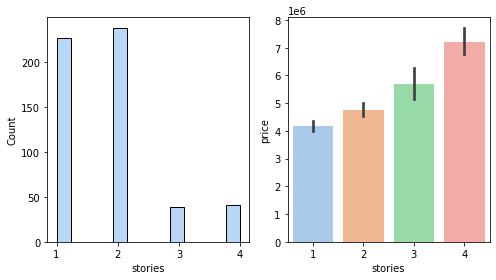

In [44]:
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_data, x='stories', ax=axes[0])
sns.barplot(data=cleaned_data, x='stories', y='price', ax=axes[1])
plt.show()

此数据集中房子的楼层数范围为1-4层，其中大多房子有1层或2层。

从平均房价与楼层数之间的柱状图来看，楼层多的房子价格也相应高。

### 车库数与房价

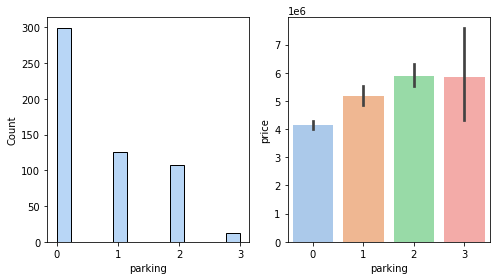

In [45]:
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_data, x='parking', ax=axes[0])
sns.barplot(data=cleaned_data, x='parking', y='price', ax=axes[1])
plt.show()

从平均房价与楼层数之间的柱状图来看，车库多的房子价格也相应高，但超过2个后，房价并不一定相应更高。

### 是否在主路与房价

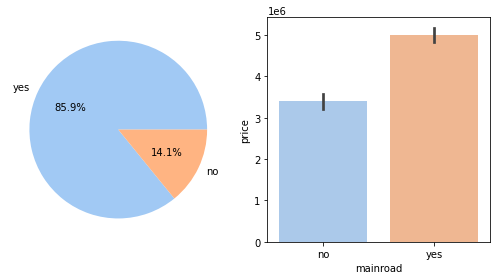

In [49]:
figure, axes = plt.subplots(1, 2)
mainroad_count = cleaned_data['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label,autopct = "%.1f%%")
sns.barplot(data=cleaned_data, x='mainroad', y='price', ax=axes[1])
plt.show()

此数据集中房子大多数位于主路。

从平均房价与楼层数之间的柱状图来看，在主路的的房子价格也相应高。

### 是否有客人房与房价

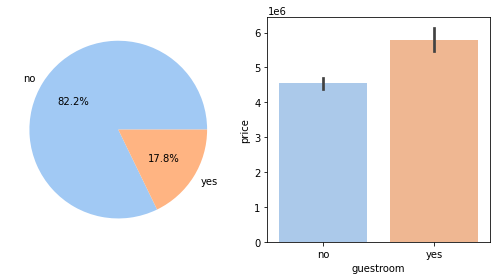

In [50]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_data['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label,autopct = "%.1f%%")
sns.barplot(data = cleaned_data, x='guestroom', y='price', ax=axes[1])
plt.show()

此数据集中房子大部分没有客人房。

从平均房价与楼层数之间的柱状图来看，有客人房的的房子价格也相应高。

### 是否有地下室与房价

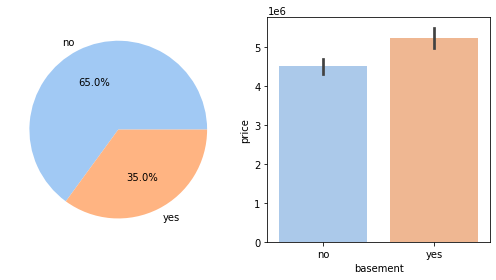

In [52]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_data['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label,autopct = "%.1f%%")
sns.barplot(data = cleaned_data, x='basement', y='price', ax=axes[1])
plt.show()

此数据集中更多的房子没有地下室。

从平均房价与地下室之间的柱状图来看，有地下室的的房子价格也相应高。

### 是否有热水器与房价

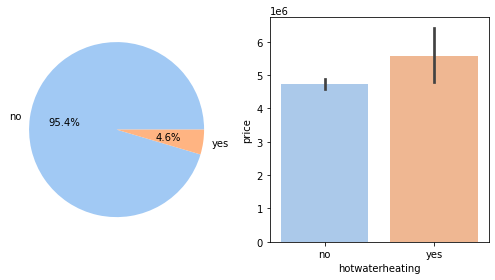

In [53]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_data['hotwaterheating'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label,autopct = "%.1f%%")
sns.barplot(data = cleaned_data, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

此数据集中房子绝大部分没有热水器。

从平均房价与热水器之间的柱状图来看，有热水器的的房子价格也相应高

### 是否有空调与房价

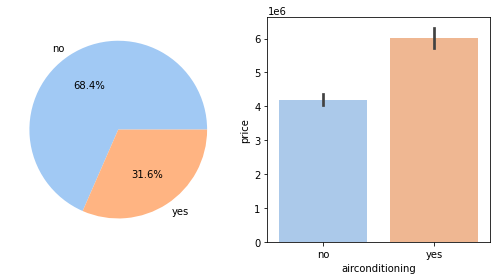

In [54]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_data['airconditioning'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label,autopct = "%.1f%%")
sns.barplot(data = cleaned_data, x='airconditioning', y='price', ax=axes[1])
plt.show()

此数据集中更多的房子没有空调。

从平均房价与空调之间的柱状图来看，有空调的的房子价格也相应高。

### 是否位于城市首选社区与房价

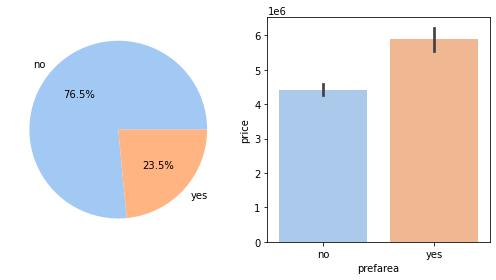

In [55]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_data['prefarea'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label,autopct = "%.1f%%")
sns.barplot(data = cleaned_data, x='prefarea', y='price', ax=axes[1])
plt.show()

此数据集中大部分房子不在城市首选社区。

从平均房价与城市首选社区之间的柱状图来看，在城市首选社区的的房子价格也相应高。


### 装修状态与房价

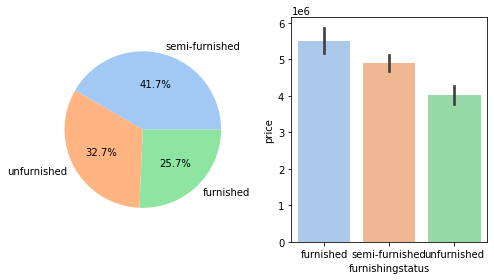

In [57]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_data['furnishingstatus'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label,autopct = "%.1f%%")
sns.barplot(data = cleaned_data, x='furnishingstatus', y='price', ax=axes[1])
plt.show()

## 分析数据

In [58]:
cleaned_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


在分析步骤中，我们将利用`cleaned_data`的数据，进行线性回归分析，目标是得到一个可以根据房屋各个属性对价格进行预测的数学模型。

我们先引入做线性回归所需的模块。

In [59]:
import statsmodels.api as sm

In [60]:
lr_house_price = cleaned_data.copy()
#linear regression

In [61]:
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [62]:
lr_house_price = pd.get_dummies(lr_house_price,drop_first=True,columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'],dtype= int)
lr_house_price 

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来，我们要把因变量和自变量划分出来。

因变量是price变量，因为我们进行线性回归的目的，是得到一个能根据其它可能对房屋价格有影响的变量，来预测销售价格的模型。

In [63]:
y = lr_house_price['price']

我们可以把除价格之外的都纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [64]:
X = lr_house_price.drop('price', axis=1)

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可

In [66]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


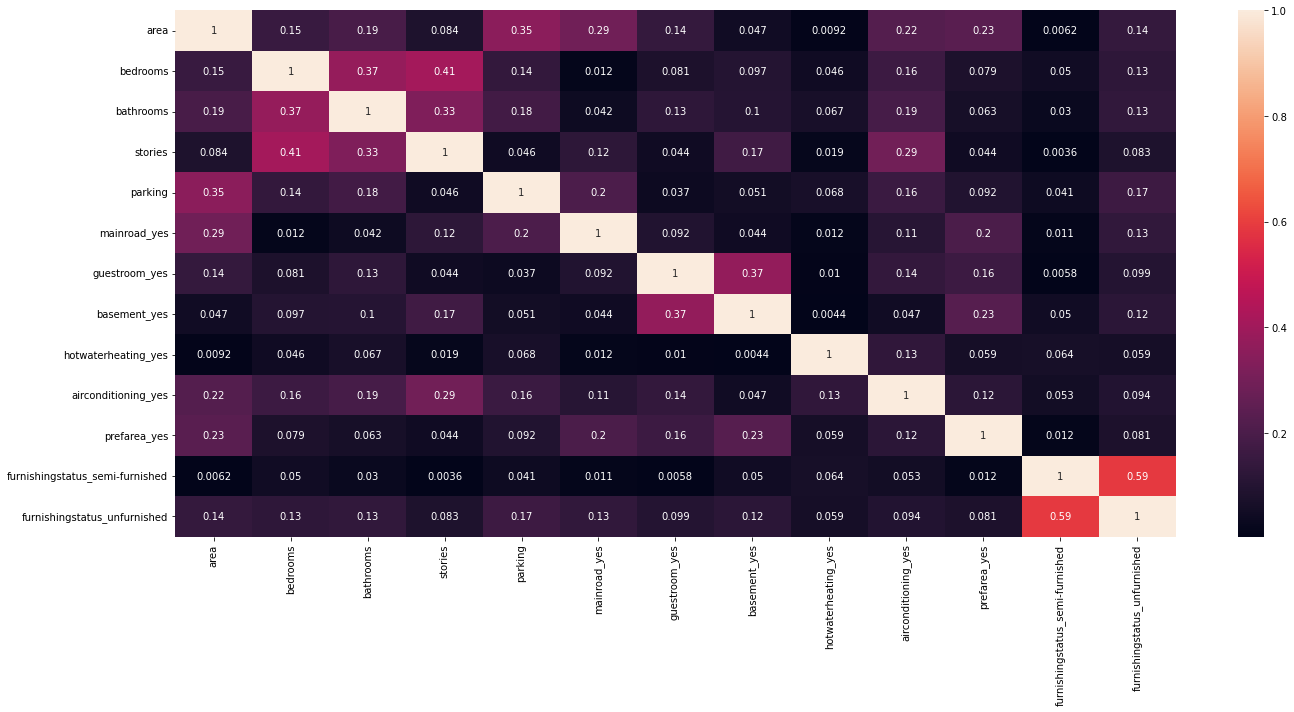

In [68]:
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(X.corr().abs(),annot=True)
plt.show()

从以上输出来看，不同变量之间相关系数的绝对值均小于或等于0.8。

接下来，给模型的线性方程添加截距。

In [70]:
X = sm.add_constant(X)
X

D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [71]:
model = sm.OLS(y,X).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 23 Feb 2024   Prob (F-statistic):          9.07e-123
Time:                        19:14:34   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为以下因素对房屋价格没有显著性影响：卧室数、是否为简装房。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。

可以把这些变量移除后，再次建立线性回归模型。

In [73]:
X = X.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [74]:
model = sm.OLS(y, X).fit()

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:20:38   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，当我们把P值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了模型对现有数据的拟合度。

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

线性回归模型预测以下因素的增加（或存在）会显著降低房屋价格：房屋未经装修，为毛坯房。

In [76]:
# 要预测房价的房屋的信息：
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修

In [77]:
price_to_predict = pd.DataFrame({'area': [6500], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我们需要把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [80]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

下一步，对分类变量引入虚拟变量。

In [82]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [84]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

接下来就可以调用线性回归模型的`predict`方法，获得预测价格。

In [85]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64

线性回归模型预测的价格为：7071927。